In [71]:
#import the necessary libraries
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn



In [31]:
#load the dataset as .csv file
data = pd.read_csv('creditcard.csv')

In [32]:
print(data.shape)   #print the number of rows and columns

(284807, 31)


In [33]:
print(data.columns)   #printing the columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [34]:
print(data.describe()) 

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [35]:
data = data.sample(frac=0.1 , random_state=1)  #taking 10% of the data

print(data.shape)

(28481, 31)


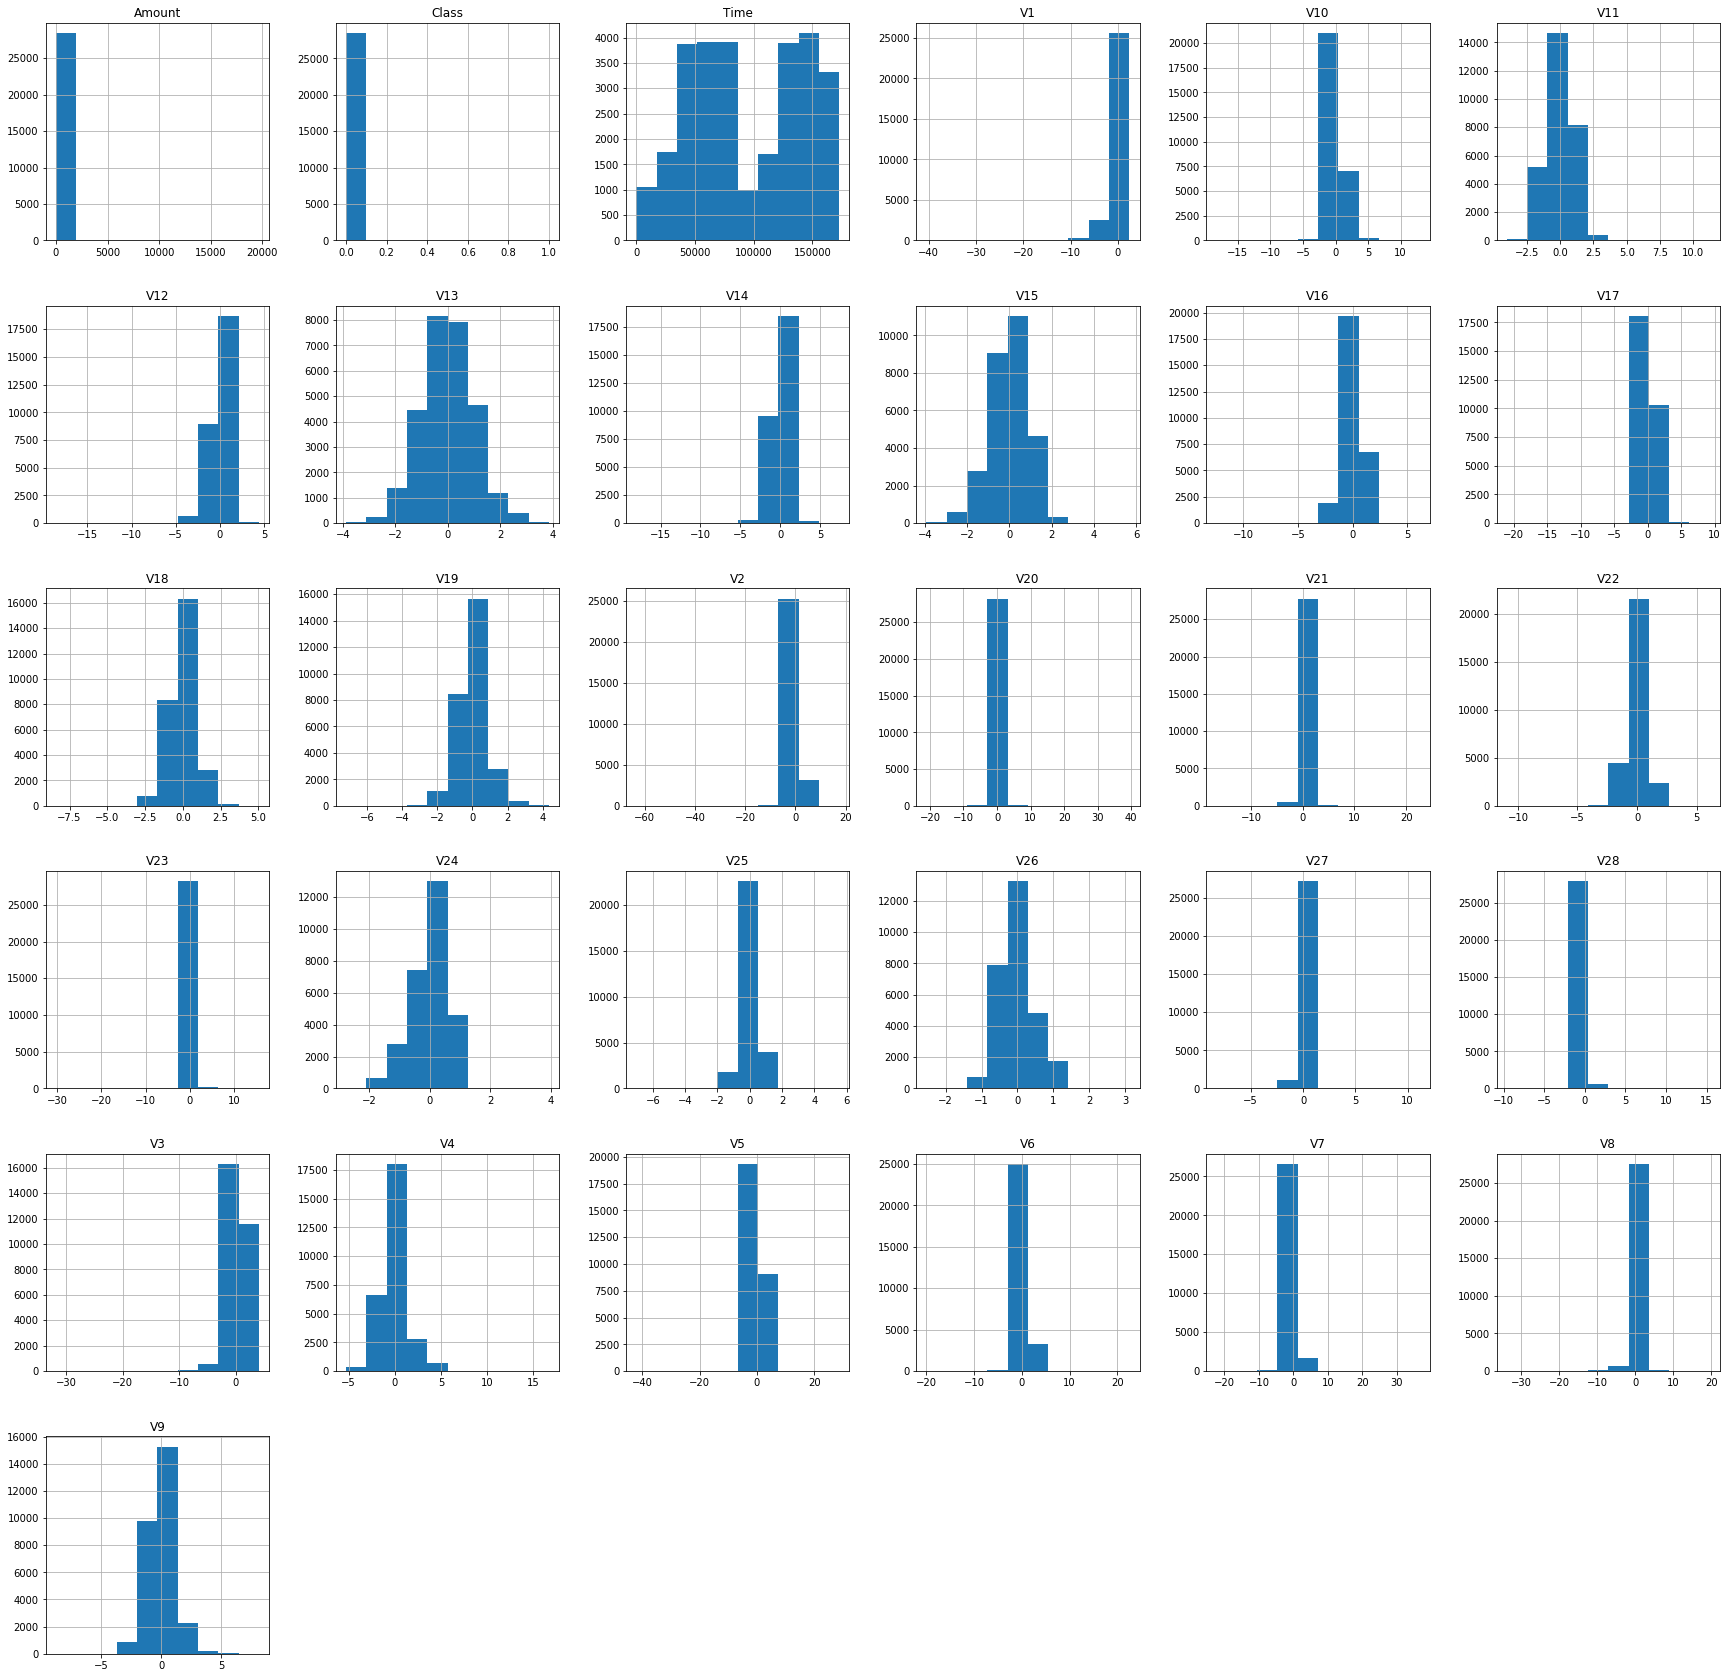

In [36]:
data.hist(figsize=(30,30))  #plotting histograms of all parameters
plt.show()

In [37]:
fraud = data[data['Class']==1]   #identifying number of fraud cases in data set
normal = data[data['Class']==0]  #identifying number of valid cases in data set

fraction = len(fraud)/float(len(normal))
print(fraction)
print("Number of fraud cases: {}".format(len(fraud)))
print("Number of valid cases: {}".format(len(normal)))

0.0017234102419808666
Number of fraud cases: 49
Number of valid cases: 28432


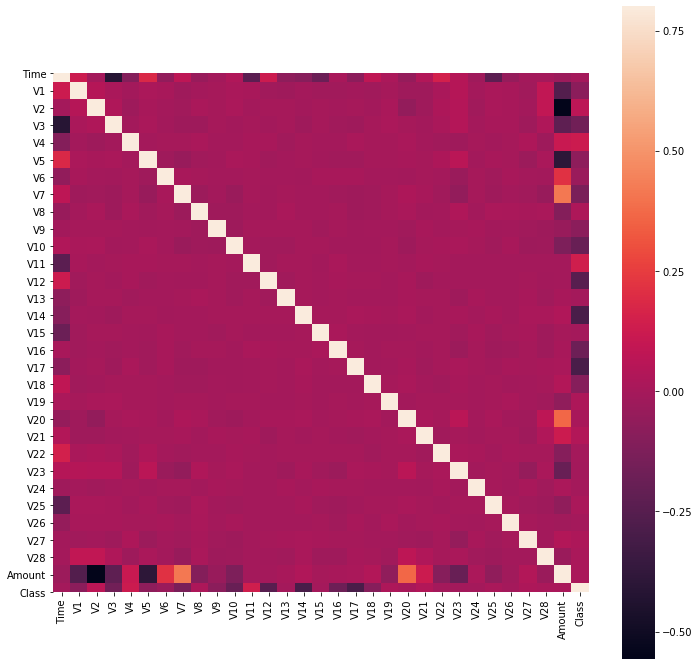

In [67]:
#defining a correlation matrix to see the variations and important parameters for our class
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, vmax=.8,square=True)
plt.show()

Darker color represents negative correlation whereas the brighter one represents positive correlation.
From the map, V17 is a negative correlation and V11 is a positive correlation

In [68]:
columns  = data.columns.tolist()   #generates all the columns to a list

columns = [c for c in columns if not c in ["Class"]]  #removing the columns we do not need

target = 'Class'  #storing the variable we will be predicting on
X = data[columns]
Y = data[target]
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


Importing IsolationForest and LocalOutlierFactor to do anamoly detection on our data set

In [69]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest  
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


state=1   #defining a random state

#defining the outlier detection methods
classifiers = {
    "Isolation Forest" :IsolationForest(max_samples=len(X),contamination=fraction,random_state=state),
    "Local Outlier Factor" :LocalOutlierFactor(n_neighbors=20,contamination=fraction,novelty=True)

}


In [70]:
#fit the model
n_outliers=len(fraud)

for i,(clf_name,clf) in enumerate(classifiers.items()):
    if  clf_name=="LocalOutlierFactor":
        y_predict=clf.fit_predict(X)
        scores_predict=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_predict=clf.decision_function(X)
        y_predict=clf.predict(X)
    y_predict[y_predict==1]=0   #reshaping the prediction value to 0 for valid
    y_predict[y_predict==-1]=1  #reshaaping the prediction value to 1 for fraud
    
    n_errors=(y_predict!=Y).sum()
    
    print('{}: {}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_predict))
    print(classification_report(Y,y_predict))

C:\Users\91912\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\91912\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 83
0.9970857764825674
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.03      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



We had an accuracy of 99.75% and a precision of 0.28 in detecting the fradulent cases.